## Forest Fire Prediction

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [280]:
forest =pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
forest

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [281]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [282]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [283]:
# checking rows that have any empty value
forest[forest.isnull().any(axis =1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## Our Dataset is divided into two sets of Data
- Sidi-Bel Abbes Region Dataset (1)
- Bejaia Region Dataset 
So, We will create new feature that will be Region

In [284]:
forest.loc[0:122,"Region"] =0
forest.loc[122:, "Region"] =1

In [285]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [286]:
# typecasting region col
forest["Region"] =forest["Region"].astype(int)

In [287]:
# removing null vlaues rows
forest.dropna(how ="any", inplace=True)

In [288]:
forest.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [289]:
forest.reset_index(inplace=True)

In [290]:
forest.loc[122]

index                  123
day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                   1
Name: 122, dtype: object

In [291]:
# dropping 122th row
forest.drop(122, inplace=True)

In [292]:
forest.reset_index(inplace=True)

In [293]:
forest.loc[122]

level_0                123
index                  124
day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 122, dtype: object

In [294]:
forest.drop(columns= ["level_0",	"index"], inplace=True)

In [295]:
forest

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [296]:
# fixes spaces in cols names
forest.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [297]:
forest.columns =forest.columns.str.strip()

In [298]:
# Type Casting Our Columns
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [299]:
forest[["day","month","year","Temperature","RH","Ws"]] =forest[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [300]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [301]:
forest["FWI"].dtype =="O"

True

In [302]:
# changing othr all types to float
for i in forest.columns:
    if forest[i].dtype=="O" and i!="Classes":
        forest[i] =forest[i].astype(float)

In [303]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


## Exploratroy Data Analysis

In [304]:
# Saving the cleaned dataset
# index =False --> Will not save index in csv
forest.to_csv("Algerian_forest_fires_dataset_CLEANED.csv", index =False)

In [305]:
# Dropping Irrelevant features
forest_copy =forest.drop(columns=["day", "month", "year"])

In [306]:
forest_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [307]:
# Encoding the classes into numerical categories
forest_copy[forest_copy["Classes"]=="not fire"]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
91,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire,0
93,22,86,15,10.1,30.5,0.7,7.0,0.0,1.1,0.0,not fire,0


In [308]:
forest_copy["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [309]:
def fun(row):
    if "not fire" in row:
        return "not fire"
    else:
        return "fire"
forest_copy["Classes"] =forest_copy["Classes"].apply(func=fun)

In [310]:
forest_copy["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [311]:
def fun(row):
    if "not fire" in row:
        return 0
    else:
        return 1
forest_copy["Classes"] =forest_copy["Classes"].apply(func=fun)

In [312]:
forest_copy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

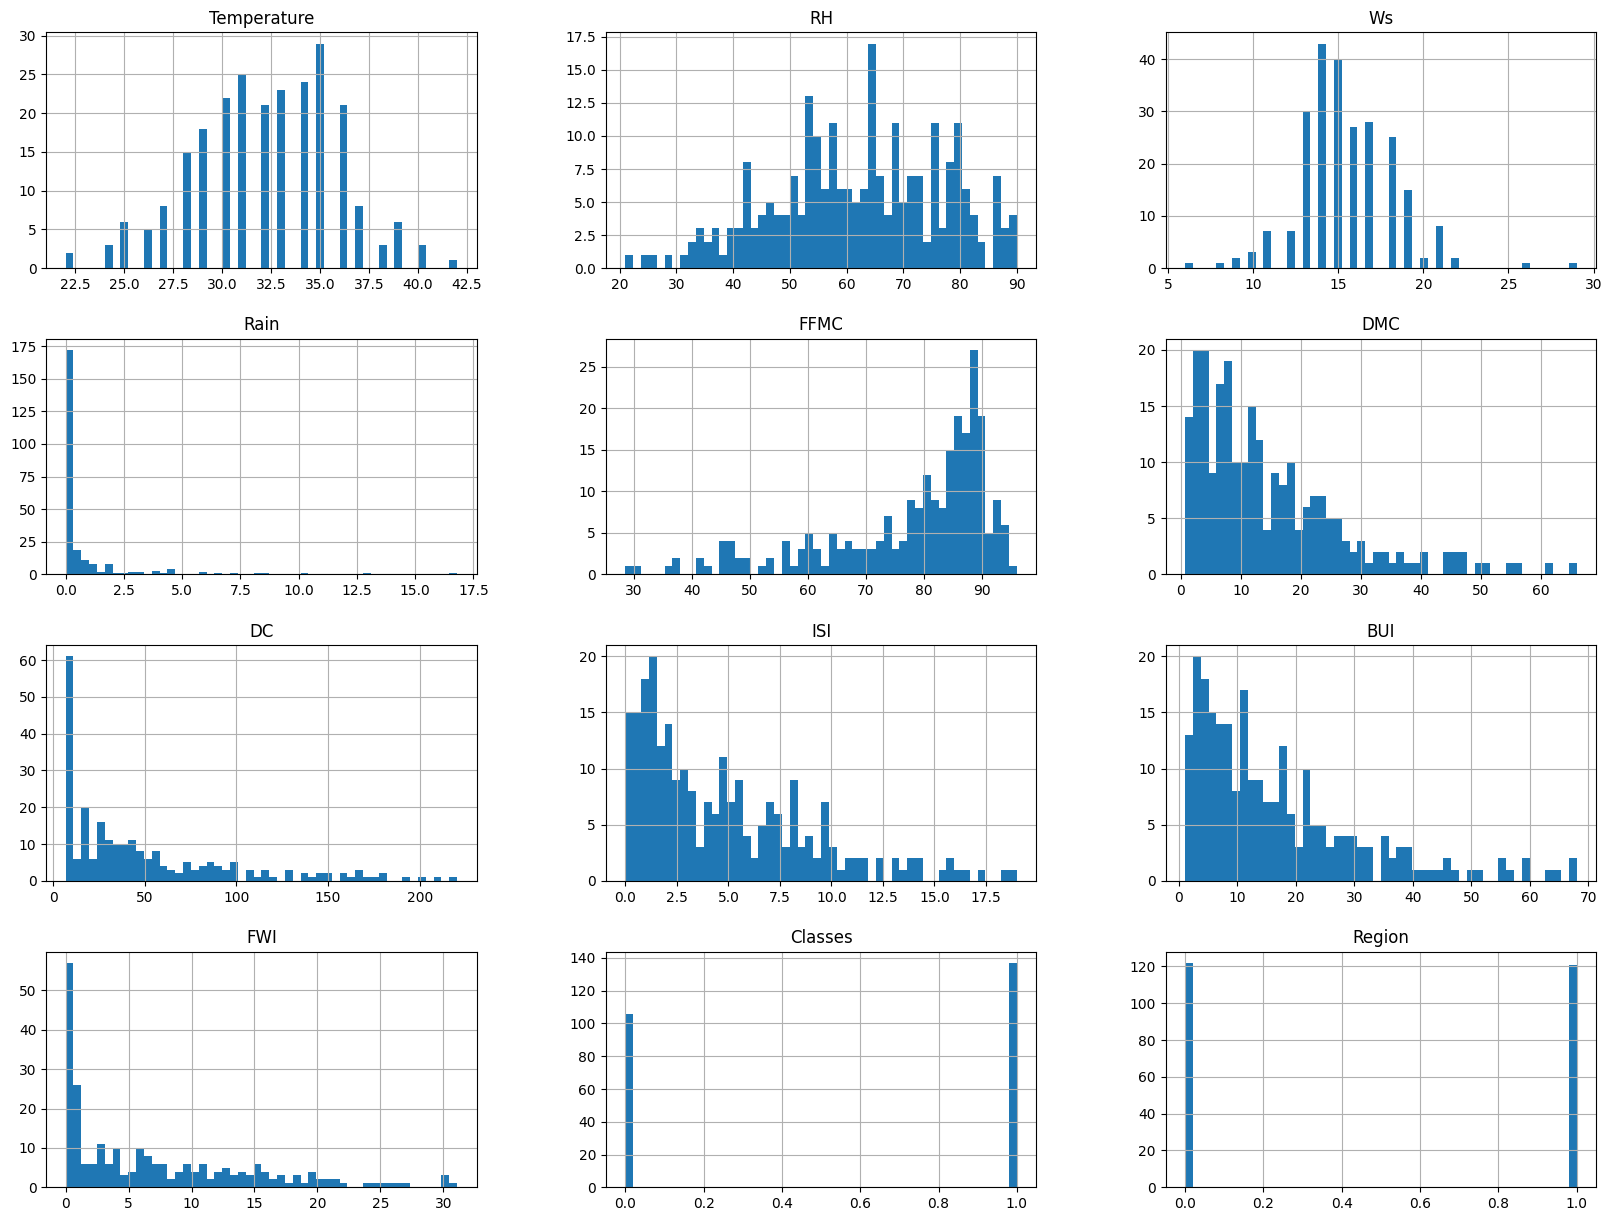

In [313]:
# Density Plots for All variables
forest_copy.hist(bins =50, figsize =(20, 15))

In [314]:
# Percentage for Pie Chart
percentage =forest_copy["Classes"].value_counts(normalize=True)*100

([<matplotlib.patches.Wedge at 0x23c56ab6e70>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'Fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'Not Fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.38'),
  Text(0.11943085088941681, -0.5879934284121123, '43.62')])

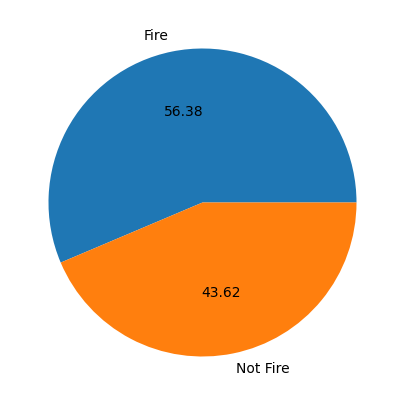

In [315]:
plt.figure(figsize=(5,5))
plt.pie(percentage, labels =["Fire", "Not Fire"], autopct="%.2f")

In [316]:
# Correlations
forest_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

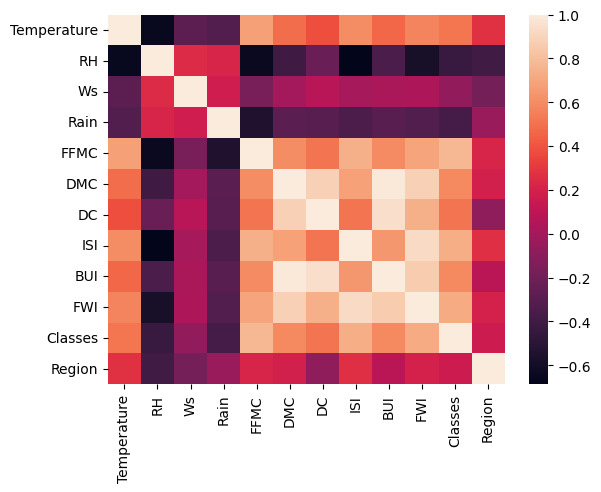

In [317]:
# Creating Heatmap
sns.heatmap(forest_copy.corr())

In [318]:
def fun(row):
    if "not fire" in row:
        return 0
    else:
        return 1
forest["Classes"] =forest["Classes"].apply(func=fun)

Text(0.5, 0, 'Month Number')

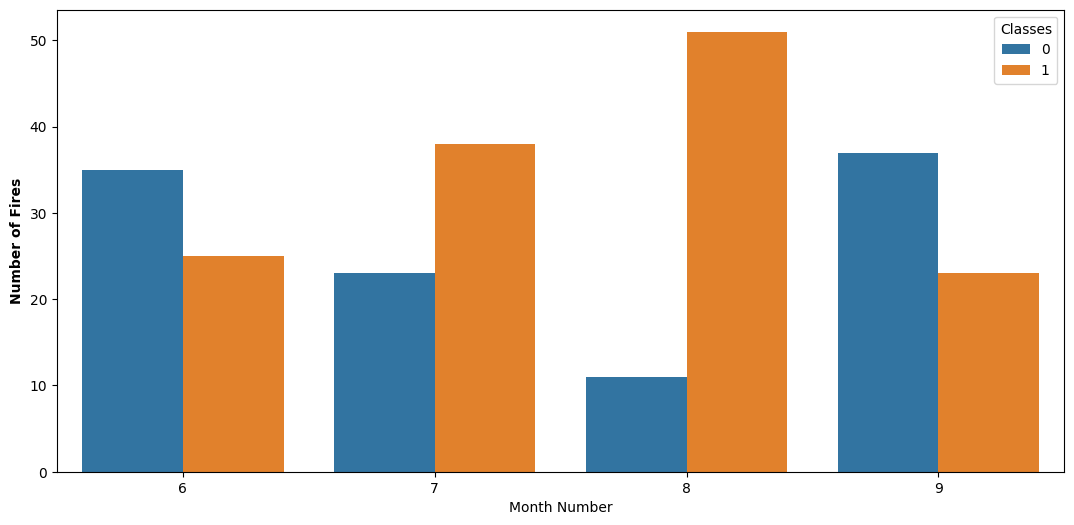

In [319]:
# Monthly Fire Analyis
plt.subplots(figsize =(13, 6))
sns.countplot(x ="month", hue="Classes", data =forest)
plt.ylabel("Number of Fires", weight ="bold")
plt.xlabel("Month Number")

In [320]:
# Independent and Dependent Variables
X =forest_copy.drop("FWI", axis =1)
Y =forest_copy["FWI"]

In [321]:
# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, random_state=42, test_size=0.25)

<Axes: >

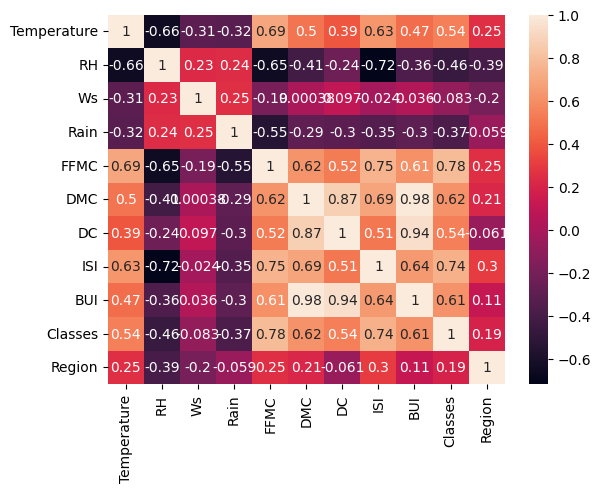

In [322]:
## Checking for multicollinearty
sns.heatmap(X_train.corr(), annot=True)

In [323]:
# threshold
def correlation(data, thresold):
    s =set()
    corr_matrix =data.corr()
    for i in range(len(corr_matrix.columns)):

        for j in range(i):
     
            if abs(corr_matrix.iloc[i, j])>thresold:
    
                s.add(corr_matrix.columns[i])
    return s

       


In [324]:
corr_f =correlation(X_train, 0.85)
corr_f

{'BUI', 'DC'}

In [325]:
# Drop Features when correlation is more tham 0.85
X_train.drop(columns=["BUI", "DC"], inplace=True)
X_test.drop(columns=["BUI", "DC"], inplace=True)

In [326]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
s =StandardScaler()
X_train =s.fit_transform(X_train)
X_test =s.transform(X_test)

In [327]:
# applying linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
linearreg =LinearRegression()
linearreg.fit(X_train, Y_train)
y_pred =linearreg.predict(X_test)
print("R2_Score: ", r2_score(y_pred, Y_test))
print("MAE: ", mean_absolute_error(y_pred, Y_test))

R2_Score:  0.9839977157632893
MAE:  0.5468236465249978


In [328]:
# Ridge Regresion
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
linearreg =Ridge()
linearreg.fit(X_train, Y_train)
y_pred =linearreg.predict(X_test)
print("R2_Score: ", r2_score(y_pred, Y_test))
print("MAE: ", mean_absolute_error(y_pred, Y_test))

R2_Score:  0.9834070933284211
MAE:  0.5642305340105715


In [329]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error
linearreg =Lasso()
linearreg.fit(X_train, Y_train)
y_pred =linearreg.predict(X_test)
print("R2_Score: ", r2_score(y_pred, Y_test))
print("MAE: ", mean_absolute_error(y_pred, Y_test))

R2_Score:  0.926474232680569
MAE:  1.133175994914409


## Hyperparamter Tunning

## LassoCV

In [330]:
from sklearn.linear_model import LassoCV
# Divide dataset into 5 folds
lc =LassoCV(cv =5)
lc.fit(X_train, Y_train)

LassoCV(cv=5)

In [331]:
# to check value of selected alpha(lambda)
lc.alpha_

np.float64(0.05725391318234408)

In [332]:
# to get all values of alpha
lc.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [333]:
# Each value represent mse of specific alpha for specific fold
lc.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [334]:
# No. of fold per alpha =5
# Total alphas =100
# so there will be 500 values
lc.mse_path_.shape

(100, 5)

In [335]:
# Prediction and checking accuracy
y_pred =lc.predict(X_test)
print("R2_Score: ", r2_score(y_pred, Y_test))
print("MAE: ", mean_absolute_error(y_pred, Y_test))


R2_Score:  0.980851982434192
MAE:  0.619970115826343


## RidgeCV

In [336]:
from sklearn.linear_model import RidgeCV
# Divide dataset into 5 folds
rc =RidgeCV(cv =5)
rc.fit(X_train, Y_train)
y_pred =rc.predict(X_test)
print("R2_Score: ", r2_score(Y_test, y_pred))
print("MAE: ", mean_absolute_error(y_pred, Y_test))


R2_Score:  0.9842993364555512
MAE:  0.5642305340105715


## ElasticNet CV

In [337]:
from sklearn.linear_model import ElasticNetCV
# Divide dataset into 5 folds
encv =ElasticNetCV(cv =5)
encv.fit(X_train, Y_train)
y_pred =encv.predict(X_test)
print("R2_Score: ", r2_score(Y_test, y_pred))
print("MAE: ", mean_absolute_error(y_pred, Y_test))


R2_Score:  0.9814217587854941
MAE:  0.6575946731430898


## Pickling the ML Model

In [338]:
import pickle
pickle.dump(rc, open("ridge.pkl", "wb"))
pickle.dump(s, open("scaler.pkl", "wb"))